In [209]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
#%config InlineBackend.figure_format='retina'

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.stats import LombScargle
plt.style.use('seaborn-whitegrid')

from scipy import integrate
import astropy
from astropy.time import Time

import pyfits
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.stats import LombScargle
import matplotlib.ticker as ticker

import numpy as np
from numpy import cov,corrcoef
import matplotlib.pyplot as plt
import astropy.units as u
from scipy.optimize import curve_fit
import scipy
import scipy.stats as stats
import pandas as pd
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [353]:
1/321.5189061

0.0031102370063705565

In [43]:
topticalHJD=np.array([2449738.010,2452281.416,2452649.529,2453030.395])
topticalMHJD=topticalHJD-2400000.5
#poptical=np.array([321.54629,321.53314,321.53007,321.52832])
poptical=np.array([321.5393,321.53314,321.53007,321.52832])
erroptical=np.array([0.00008,0.00034,0.0006,0.00044])
errmu=erroptical*10**-5
muoptical=1/poptical

xraychandracombinetime=np.array([53009.88249,55185.8956688])
xraychandracombinefreq=np.array([3.11014267,3.11020875])*0.001
xraychandrap=1/xraychandracombinefreq

xrayxmmtime=np.array([52580.39238,53314.72095,54744.886,56212.99029,57496.37908])
xrayxmmfreq=np.array([3.1102987,3.1098837,3.1098568,3.109474,3.1107573])*0.001

xrayxrttime=np.array([52619,53623.056319,55285.040267])
xrayxrtfreq=np.array([3.11012599,3.11015016,3.1102389])*0.001

print(topticalMHJD)

[ 49737.51   52280.916  52649.029  53029.895]


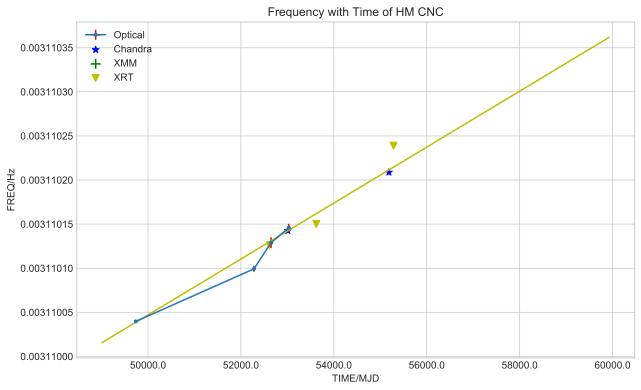

In [99]:
a=10
b=a*0.618
plt.figure(figsize=(a,b))
type1=plt.errorbar(topticalMHJD,muoptical,xerr=0,yerr=errmu,fmt='.-',ecolor='red')
type2=plt.scatter(xraychandracombinetime,xraychandracombinefreq,s=50,c='b',marker='*')
#type3=plt.scatter(xrayxmmtime,xrayxmmfreq,s=100,c='g',marker='+')
type4=plt.scatter(xrayxrttime,xrayxrtfreq,s=50,c='y',marker='v')

plt.xlabel("TIME/MJD")
plt.ylabel("FREQ/Hz")
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.8f'))


mu0=0.0031101425     # HZ   
t0=53009.889943753 #MJD(TDB)
mudot=3.67*10**-16
detamu=mu0-0.00311
detat=30*np.arange(365)-4000
t=detat+t0
mu=mu0+detat*86400*mudot

mjdt=Time(t,format='mjd')

plt.plot(t,mu,c="y")
plt.title("Frequency with Time of HM CNC")
#plt.annotate("predicted",xytext=(t[-1]-1000,mu[-1]-detamu),xy=(t[-1]-2000,mu[-1]-detamu),arrowprops=dict(facecolor='y',shrink=0.01),)
plt.legend((type1,type2,type3,type4),('Optical','Chandra','XMM','XRT'))
plt.savefig('/Users/brettlv/Desktop/freqtimeall.png',dpi=300)

In [52]:


time=np.hstack((topticalMHJD,xraychandracombinetime,xrayxrttime))
mu=np.hstack((muoptical,xraychandracombinefreq,xrayxrtfreq))

#time_chandra=np.hstack((topticalMHJD,xraychandracombinetime)
                       

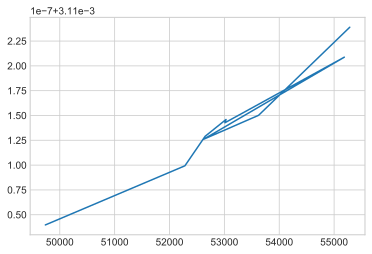

In [53]:
plt.plot(time,mu)

In [68]:
time.sort()
mu.sort()
mu,time

(array([ 0.00311004,  0.0031101 ,  0.00311013,  0.00311013,  0.00311014,
         0.00311015,  0.00311015,  0.00311021,  0.00311024]),
 array([ 49737.51     ,  52280.916    ,  52619.       ,  52649.029    ,
         53009.88249  ,  53029.895    ,  53623.056319 ,  55185.8956688,
         55285.040267 ]))

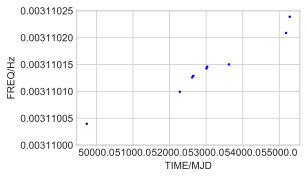

In [69]:
def mudotdottime(t,mudot,muzero,mudotdot):
    #mudotdot=0
    tzero=time[0]
    return muzero+(t-tzero)*mudot*86400+0.5*mudotdot*(t-tzero)**2*86400**2


def mudottime(t,mudot,muzero):
    #mudotdot=0
    tzero=time[0]
    return muzero+(t-tzero)*mudot*86400



a=4
b=a*0.618
plt.figure(figsize=(a,b))
plt.scatter(time,mu,s=10,c='b',marker='.')
plt.ylim(0.00311,0.00311025)
plt.xlabel("TIME/MJD")
plt.ylabel("FREQ/Hz")
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.8f'))





In [70]:
time.size

9

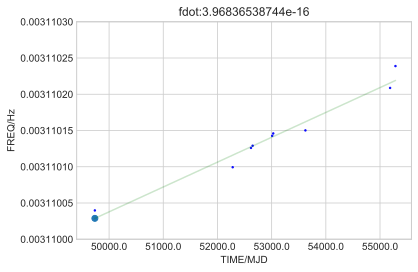

In [97]:
nummin=0
nummax=9
x=time[nummin:nummax]
y=mu[nummin:nummax]
popt,pcov=curve_fit(mudottime,x,y)
perr=np.sqrt(np.diag(pcov))
xx=np.arange(time[0],time[-1])
plt.plot(xx,mudottime(xx,*popt),'g',alpha=0.2)
plt.scatter(x,y,s=10,c='b',marker='.',alpha=0.9)
plt.scatter(time[0],popt[1])
plt.ylim(0.00311,0.0031103)
plt.xlabel("TIME/MJD")
plt.ylabel("FREQ/Hz")
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.8f'))
plt.title("fdot:%s"%popt[0])
plt.savefig('/Users/brettlv/Desktop/freqdot.png',dpi=300)


In [73]:
print(x.size,nummin,nummax,np.average(x),popt[0],popt[1])

9 0 9 53046.6916383 3.96836538744e-16 0.00311002881527


In [49]:
print(x.size,nummin,nummax,np.average(x),popt[0],popt[1])

7 0 7 52788.0263541 3.15055394847e-16 0.00311004394183


In [42]:
print(x.size,nummin,nummax,np.average(x),popt[0],popt[1])

4 0 4 51924.3375 3.53576350636e-16 0.00311003669837


In [43]:
(3.61530235061e-16-3.53576350636e-16)/(52141.446498-51924.3375)

3.6635443478948403e-20

In [46]:
print(x.size,nummin,nummax,np.average(x),popt[0],popt[1])

5 0 5 52141.446498 3.61530235061e-16 0.00311003624755


In [28]:
print(x.size,nummin,nummax,np.average(x),popt[0],popt[1])

6 0 6 52648.8546933 3.14729096745e-16 0.00311004394879


In [22]:
print(x.size,nummin,nummax,np.average(x),popt[0],popt[1])

4 0 4 51924.3375 3.53576350636e-16 0.00311003669837


In [25]:
print(x.size,nummin,nummax,np.average(x),popt[0],popt[1])

8 0 8 53100.1530933 3.66527307498e-16 0.00311003448133


In [ ]:
print(np.average(x),popt)

In [ ]:
print(np.average(x),popt)

In [ ]:
print(np.average(x),popt)

In [ ]:
print(np.average(x),popt)

In [ ]:
print(np.average(x),popt)

In [ ]:
print(np.average(x),popt)

In [ ]:
(3.61530235e-16-3.53576351e-16)/(52141.446498-51924.3375)/86400

In [76]:
print(time.size,time[7])
print(time[:8])

9 55185.8956688
[ 49737.51       52280.916      52619.         52649.029      53009.88249
  53029.895      53623.056319   55185.8956688]


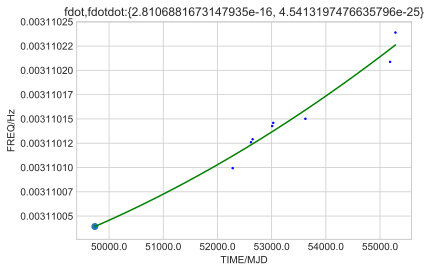

In [98]:
nummin=0
nummax=9
x=time[nummin:nummax]
y=mu[nummin:nummax]
popt,pcov=curve_fit(mudotdottime,x,y)
perr=np.sqrt(np.diag(pcov))
xx=np.arange(time[0],time[-1])
plt.plot(xx,mudotdottime(xx,*popt),'g')
plt.scatter(x,y,s=10,c='b',marker='.')
plt.scatter(time[0],popt[1])
#plt.ylim(0.0031098,0.00311025)
plt.xlabel("TIME/MJD")
plt.ylabel("FREQ/Hz")
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.8f'))
plt.title("fdot,fdotdot:%s"%{popt[0],popt[2]})
plt.savefig('/Users/brettlv/Desktop/freqdotdot.png',dpi=300)


In [75]:
print(x.size,nummin,nummax,np.average(x),popt[0],popt[1],popt[2])


9 0 9 53046.6916383 2.81068816731e-16 0.00311003924854 4.54131974766e-25


In [62]:
print(x.size,nummin,nummax,np.average(x),popt[0],popt[1],popt[2])

6 0 6 52648.8546933 4.0203865301e-16 0.0031100377412 -3.826755574e-25


In [53]:
print(x.size,nummin,nummax,np.average(x),popt[0],popt[1],popt[2])

8 0 8 53100.1530933 3.12318924458e-16 0.0031100390267 2.14431626356e-25


In [104]:
1/3.11

0.3215434083601286

$\frac{\dot{f}}{f}=-\frac{\dot{P}}{P}$

In [1]:
mudot=3.6718*10**-11/321.5303822**2
print(mudot)
mudot=1.9*10**-11/321.5303822**2
print(mudot)
mudot=1.6*10**-11/321.5303822**2
print(mudot)

P=321.5
mudot=3.6*10**-16
pdot=mudot*P**2
print(pdot)


3.551689439695866e-16
1.8378479044125891e-16
1.5476613931895486e-16
3.721041e-11


In [109]:
(3.55-3.63)/(52619-53009.88994375)*10**-16

2.0466118732173186e-20

In [1]:
(0.5/0.8)**(-1/3)*6500

7602.446119353453

In [3]:
1/321.5303822,1/321.5189061


(0.003110125995427626, 0.0031102370063705565)

In [33]:
import math
from scipy.optimize import bisect
from scipy.optimize import brentq
from scipy.optimize import brenth
import numpy as np



q=0.5
mu_mass=m1*q/(1+q)
chirp_equalmass=(2.7*10**16*3.11**(-11/3)*3.6*10**-16)**0.6 #chip equal mass/msun
chirpmass=(2.7*10**16*3.11**(-11/3)*3.6*10**-16)**0.6
m1=chirpmass*(1+q)**(1/5)/q**(3/5)
m2=m1*q

G=6.67*10**-11
P=321.5#s
Pdot=3.721041e-11
mudot=3.67*10**-16
msun=2*10**30#kg
r_sun=6.963*10**8#m
c=3*10**8#m

#a=r_sun*0.089
#a=(G*m1*P**2/4/np.pi**2*msun)**(1/3)#m
#a=(G*0.8*msun*P/c/Pdot)**0.5
a=(96/5*P/Pdot*(G*(m1+m2)*msun)**3/c**5*q/(1+q)**2)**0.25


L_gw=32/5*G**4/a**5/c**5*(m1**2*m2**2*(m1+m2)*msun**5)*10**7# erg/s
sigma=5.6704*10**-5# Stefan-Boltzmann constant ergcm-2s-1K-4

R1=6.5*10**6*(m1/0.8)**(-1/3)
T1=32400
T_irr=T1/(a/R1)**0.5
#T_irr=14800#K



L_bol=4*np.pi*(a*100)**2*sigma*T_irr**4
mudot_gw=1.64*10**-17*3.11**5*mu_mass*(a/10**10*10**2)**2
mudotdot_gw=4.95*10**-30*3.11**(19/3)*(chirpmass/0.871)**(10/3)
print(q,m1,m2,chirpmass,R1)
print("Separation",a/r_sun,"$r_{\odot}$")
print("T_irradition:",T_irr,'K')
print(L_gw,L_bol,mudot_gw,mudotdot_gw)

print()
flux=1.5*10**-11#ergcm-2s-1
#flux=5*10**-9
#flux=5*10**-12
d=(L_gw/flux/4/np.pi)**0.5 #cm
d_pc=d/3.08567756/10**18
print(d,L_gw,flux,d_pc)

d=(L_bol/flux/4/np.pi)**0.5 #cm
d_pc=d/3.08567756/10**18
print(d,L_bol,flux,d_pc)

0.5 0.5301065279083363 0.2650532639541682 0.32249790898424735 7455709.33057377
Separation 0.09368305106087826 $r_{\odot}$
T_irradition: 10953.698518140855 K
2.217108443834831e+35 4.3649727532882704e+32 5.414138589525339e-16 2.3829603877080913e-28

3.4295955456734406e+22 2.217108443834831e+35 1.5e-11 11114.5622930007
1.5217391258548757e+21 4.3649727532882704e+32 1.5e-11 493.16206773557883


In [355]:
3219.9-2256

963.9000000000001

In [33]:
1.3/0.34,1e2*3

(3.8235294117647056, 300.0)

In [41]:
1/321.53314,1/321.53007,1/321.52832

(0.0031100993197777376, 0.0031101290153048512, 0.003110145942976345)

In [247]:
#m1_equal=chipmass*2**0.2 #assume equal mass/msun
#mu_equalmass=m1_equal/2 #
import math
from scipy.optimize import bisect
from scipy.optimize import brentq
from scipy.optimize import brenth
import numpy as np


M0=0.8#solar mass
R0=6500000#m

q=0.4
M1=0.5#solar mass
R1=R0*(M1/M0)**(-1/3)

mu_mass=M1*q/(1+q)#solar mass reduced mass
chirpmass=(M1*M2)**0.6/(M1+M2)**0.2#solar mass
M2=M1*q
R2=R1*(M2/M1)**(-1/3)




G=6.67*10**-11
k=1.38*10**-23#J/K
h=6.626*10**-34#J*s

P=321.5#s obs orbit period
nu=1/P#orbit frequency
Pdot=3.72*10**-11
mudot=3.67*10**-16#obs mudot
msun=2*10**30#kg
r_sun=6.963*10**8#m
l_sun=3.828*10**33#erg/s
c=3*10**8#m

a_orbit=(G*(M1+M2)*msun/(4*np.pi**2*nu**2))**(1/3)
mudot_orbit=(2*np.pi)**(8/3)*96*0.2*(G*chirpmass*msun/c**3)**(5/3)*nu**(11/3)


print("nu,P,M1,R1,R1/r_sun:",nu,P,M1,R1,R1/r_sun)
print("a,R2,q,M2:",a_orbit,R2,q,M2)
print("R2/a,a/r_sun,R2/r_sun:",R2/a_orbit,a_orbit/r_sun,R2/r_sun)
print("mudot_orbit",mudot_orbit)
print("mudot_obs_orbit",mudot)


T1=27000#K 
#T1=32400#K
Tirr=T1*(R1/a)**0.5
#T1=10**6*0.5
#Tirr=(0.12*2*R1**2/R2**2*T1**4)**0.25
print(T1,Tirr,"K")
print(Tirr/T1)
sigma=5.6704*10**-5# Stefan-Boltzmann constant erg cm-2s-1K-4
Lbol=4*np.pi*(a*100)**2*sigma*Tirr**4#erg/s
Lbol1=4*np.pi*(R1*100)**2*sigma*T1**4#erg/s
print("Lbol",Lbol)
L_gw=32/5*G**4/a**5/c**5*(M1**2*M2**2*(M1+M2)*msun**5)*10**7# erg/s
print("L_gw",L_gw)
mudotdot_orbit=4.95*10**(-30)*(nu*1000)**(19/3)*(chirpmass/0.871)**(10/3)
print("mudotdot_orbit",mudotdot_orbit)

nu,P,M1,R1,R1/r_sun: 0.003110419906687403 321.5 0.5 7602446.119353453 0.010918348584451319
a,R2,q,M2: 62529558.526039906 10318106.837793296 0.4 0.2
R2/a,a/r_sun,R2/r_sun: 0.165011669377074 0.08980261169903764 0.014818478870879358
mudot_orbit 2.6713946798893484e-16
mudot_obs_orbit 3.67e-16
27000 9957.548513184769 K
0.3687980930809174
Lbol 2.1886953652018303e+32
L_gw 2.140153719073468e+35
mudotdot_orbit 1.3152242252481121e-28


In [ ]:
mdot=2*np.pi/5*nu*(M1*R1**4/G)

In [245]:
11538*64

738432

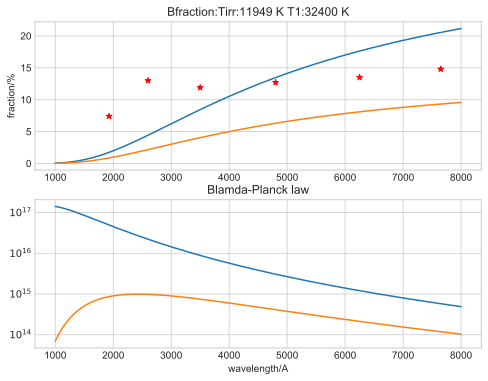

In [194]:
fig=plt.figure(figsize=(8,6))
wavelength=[3500,4800,6250,7650,2600,1928]
fraction=[11.9,12.7,13.5,14.8,13,7.4]
        
k=1.38*10**-23#J/K
h=6.626*10**-34#J*s
c=3*10**8#m

def Blamda(lamdawave,Tirr):
    blamda=2*h*c**2*lamdawave**(-5)*(np.e**(h*c/lamdawave/k/Tirr)-1)**-1
    return blamda #W*sr**-1*m**-3~0.1*erg/s*sr**-1*cm**-3

waveA=np.linspace(1000,8000,1000)
lamdawave=waveA*10**-10

rate=(np.e**(h*c/lamdawave/k/Tirr)-1)**-1/(np.e**(h*c/lamdawave/k/T1)-1)**-1
rate1=0.5*Blamda(lamdawave,Tirr)/(Blamda(lamdawave,T1)+0.5*Blamda(lamdawave,Tirr))

ax1=fig.add_subplot(2,1,1)
ax1.set_title('Bfraction:Tirr:%d K T1:%d K'%(Tirr,T1))
ax1.plot(waveA,rate*100)
ax1.plot(waveA,rate1*100)
ax1.scatter(wavelength,fraction,color='r',marker="*")
#ax1.set_xlabel("wavelength/A")
ax1.set_ylabel("fraction/%")

ax2=fig.add_subplot(2,1,2)
ax2.set_title("Blamda-Planck law")
ax2.plot(waveA,Blamda(lamdawave,T1))
ax2.set_label("T1:27000K")
ax2.plot(waveA,Blamda(lamdawave,Tirr))
#uv12=[uv1,uv2]
#ax2.scatter(uv12*10**10,Blamda(uv12,T1),marker='o')
ax2.set_xlabel("wavelength/A")
ax2.set_yscale('log')
#plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
#plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
plt.savefig('Bfrac.png',dpi=300)

In [165]:
pwd

'/Users/brettlv/blog/brettlv.github.io/pythoncode'

In [240]:
#popt,pcov=curve_fit(fluxTbbm,wavelengthbb,fluxbb1)
#popt[0],popt[1] 

/Users/brettlv/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: overflow encountered in power
/Users/brettlv/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


(1.0, 1.0)

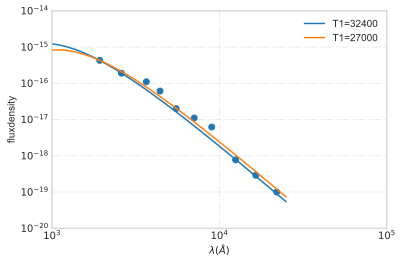

In [227]:
waveA=np.linspace(500,25000,1000)
lamdawave=waveA*10**-10
a0=1.1596318307332253e+32
a1=0.7e+32
fluxlamda32400=Blamda(lamdawave,32400)/a0
fluxlamda27000=Blamda(lamdawave,27000)/a1

plt.plot(waveA,fluxlamda32400,label='T1=32400')
plt.plot(waveA,fluxlamda27000,label='T1=27000')
plt.scatter(wavelengthbb*10**10,fluxbb)
plt.semilogy(True)
plt.semilogx(True)
plt.ylim(10**-20,10**-14)
plt.xlim(10**3,10**5)
plt.xlabel("$\lambda(\AA)$")
plt.ylabel("fluxdensity")
plt.grid(True,linestyle="-.",alpha=0.5)
plt.legend()

$\lambda$

1.1666713510255676e+32 1.152592310440883e+32 1.1596318307332253e+32 2.2166755669485784e+16 4.956146934895797e+16
1.1596318307332253e+32 total bolometric luminosity: 1.67303598326e-12
32400 11949.058215821724 7602446.119353453 10318106.837793296
distance: 1505.72976703 pc


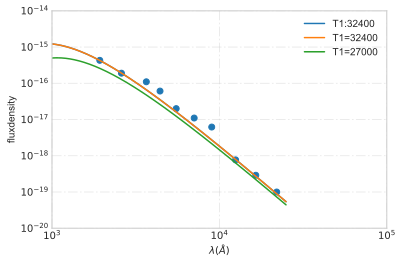

In [196]:
import numpy as np
from scipy import integrate
uv1=2600*10**-10
uv2=1928*10**-10


a1=Blamda(uv1,T1)/(1.9*10**-16)
a2=Blamda(uv2,T1)/(4.3*10**-16)
a0=(a1+a2)/2
print(a1,a2,a0,Blamda(uv1,T1),Blamda(uv2,T1))

waveA=np.linspace(500,25000,1000)
lamdawave=waveA*10**-10
fluxlamda=Blamda(lamdawave,T1)/a0
fluxlamda32400=Blamda(lamdawave,32400)/a0
fluxlamda27000=Blamda(lamdawave,27000)/a0
plt.plot(waveA,fluxlamda,label="T1:%d"%T1)
plt.plot(waveA,fluxlamda32400,label='T1=32400')
plt.plot(waveA,fluxlamda27000,label='T1=27000')
plt.scatter(wavelengthbb*10**10,fluxbb)
plt.semilogy(True)
plt.semilogx(True)
plt.ylim(10**-20,10**-14)
plt.xlim(10**3,10**5)
plt.xlabel("$\lambda(\AA)$")
plt.ylabel("fluxdensity")
plt.grid(True,linestyle="-.",alpha=0.5)
plt.legend()
fluxtot=integrate.simps(fluxlamda,waveA)#total bolometric luminosity
print(a0,"total bolometric luminosity:",fluxtot)
d=((sigma*T1**4*4*np.pi*(R1*100)**2)/(4*np.pi*fluxtot))**0.5#cm
pc=3.08567756*10**18#cm
d_pc=d/pc
print(T1,Tirr,R1,R2)
print("distance:",d_pc,"pc")

In [181]:
#a=r_sun*0.089
#a=(G*m1*P**2/4/np.pi**2*msun)**(1/3)#m
#a=(G*0.8*msun*P/c/Pdot)**0.5
#a=(96/5*P/Pdot*(G*(m1+m2)*msun)**3/c**5*q/(1+q)**2)**0.25
#T_irr=14800#K

R1=6.5*10**6
T1=32400
T_irr=T1/(a/R1)**0.5
print(T1,Tirr,R1,R2)

L_bol=4*np.pi*(a*100)**2*sigma*T_irr**4
mudot_gw=1.64*10**-17*3.11**5*mu_mass*(a/10**10*10**2)**2
mudotdot_gw=4.95*10**-30*3.11**(19/3)*(chirpmass/0.871)**(10/3)
print(q,M1,M2,chirpmass,R1)
print("Separation",a/r_sun,"$r_{\odot}$")
print("T_irradition:",T_irr,'K')
print(L_gw,L_bol,mudot_gw,mudotdot_gw)

print()
#flux=1.5*10**-11#ergcm-2s-1
#flux=5*10**-9
#flux=5*10**-16
d=(L_gw/flux/4/np.pi)**0.5 #cm
d_pc=d/3.08567756/10**18
print(d,L_gw,flux,d_pc)

d=(L_bol/flux/4/np.pi)**0.5 #cm
d_pc=d/3.08567756/10**18
print(d,L_bol,flux,d_pc)

32400 11949.058215821724 6500000.0 10318106.837793296
0.4 0.5 0.2 0.26976176347003633 6500000.0
Separation 0.08027487205867413 $r_{\odot}$
T_irradition: 11048.76355991476 K
2.140153719073468e+35 3.3176480626108776e+32 2.1296085789257262e-16 1.314100113282609e-28

5.83623203245935e+24 2.140153719073468e+35 5e-16 1891394.0030919334
2.2978687704126426e+23 3.3176480626108776e+32 5e-16 74468.85572880929


$r_{\odot}$

In [38]:
h1=0.5*10**-21*chirpmass**(5/3)*(321.5/3600)**(-2/3)*5**-1
h2=0.5*10**-21*chirpmass**(5/3)*(321.5/3600)**(-2/3)*0.5**-1
print(h1,h2)

7.590886901839642e-23 7.590886901839642e-22


In [272]:
G*0.8*msun*P/c/a**2

0.02978055145679341

In [273]:
(G*m1*P**2/4/np.pi**2*msun)**(1/3)/r_sun,(G*0.8*msun*P/c/Pdot)**0.5/r_sun

(0.0726385647885756, 2517.816914278157)

6.366559787907741e+22 2.5467687490925267e+35 5e-12 20632.615249364357
2.297868770412643e+21 3.317648062610878e+32 5e-12 744.688557288093


0.0037210648148148146


In [156]:
bisect(f,0,1)

1.8189894035458565e-12

In [157]:
brentq(f,0,1)

0.0

In [160]:
brenth(f,0,1)

0.0